In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
import graphviz as pgv

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)
full_data = train_data.append(test_data)

In [5]:
full_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0


In [6]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
drop_columns = ["Name", "Ticket", "Cabin", "Parch", "Embarked", "Fare"]

In [7]:
full_data.drop(labels=drop_columns, axis=1, inplace=True)

In [8]:
full_data

,PassengerId,Pclass,Sex,Age,SibSp,Survived
0,1,3,male,22.0,1,NaN
1,2,1,female,38.0,1,NaN
2,3,3,female,26.0,0,NaN
3,4,1,female,35.0,1,NaN
4,5,3,male,35.0,0,NaN
...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0.0
414,1306,1,female,39.0,0,1.0
415,1307,3,male,38.5,0,0.0
416,1308,3,male,NaN,0,0.0


In [9]:
full_data.fillna(value=0.0, inplace=True)

In [10]:
full_data

,PassengerId,Pclass,Sex,Age,SibSp,Survived
0,1,3,male,22.0,1,0.0
1,2,1,female,38.0,1,0.0
2,3,3,female,26.0,0,0.0
3,4,1,female,35.0,1,0.0
4,5,3,male,35.0,0,0.0
...,...,...,...,...,...,...
413,1305,3,male,0.0,0,0.0
414,1306,1,female,39.0,0,1.0
415,1307,3,male,38.5,0,0.0
416,1308,3,male,0.0,0,0.0


In [11]:
drop_columns1 = ["SibSp", "Survived"]

In [12]:
full_data.drop(labels=drop_columns1, axis=1, inplace=True)
full_data = pd.get_dummies(full_data, columns=["Sex"])

In [13]:
full_data

,PassengerId,Pclass,Age,Sex_female,Sex_male
0,1,3,22.0,0,1
1,2,1,38.0,1,0
2,3,3,26.0,1,0
3,4,1,35.0,1,0
4,5,3,35.0,0,1
...,...,...,...,...,...
413,1305,3,0.0,0,1
414,1306,1,39.0,1,0
415,1307,3,38.5,0,1
416,1308,3,0.0,0,1


In [15]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
X_train = full_data.values[0:891]
##drop_columns_2 = ["Survived"]

In [15]:
##X_train.drop(labels=drop_columns_2, axis=1, inplace=True)
X_train

array([[  1.,   3.,  22.,   0.,   1.],
       [  2.,   1.,  38.,   1.,   0.],
       [  3.,   3.,  26.,   1.,   0.],
       ...,
       [889.,   3.,   0.,   1.,   0.],
       [890.,   1.,  26.,   0.,   1.],
       [891.,   3.,  32.,   0.,   1.]])

In [16]:
X_test = full_data.values[891:]

In [17]:
X_test

array([[8.920e+02, 3.000e+00, 3.450e+01, 0.000e+00, 1.000e+00],
       [8.930e+02, 3.000e+00, 4.700e+01, 1.000e+00, 0.000e+00],
       [8.940e+02, 2.000e+00, 6.200e+01, 0.000e+00, 1.000e+00],
       ...,
       [1.307e+03, 3.000e+00, 3.850e+01, 0.000e+00, 1.000e+00],
       [1.308e+03, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.309e+03, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]])

In [18]:
test_size = 0.30
state = 12
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=state)

In [19]:
xgb_clf = XGBClassifier(max_depth = 2)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

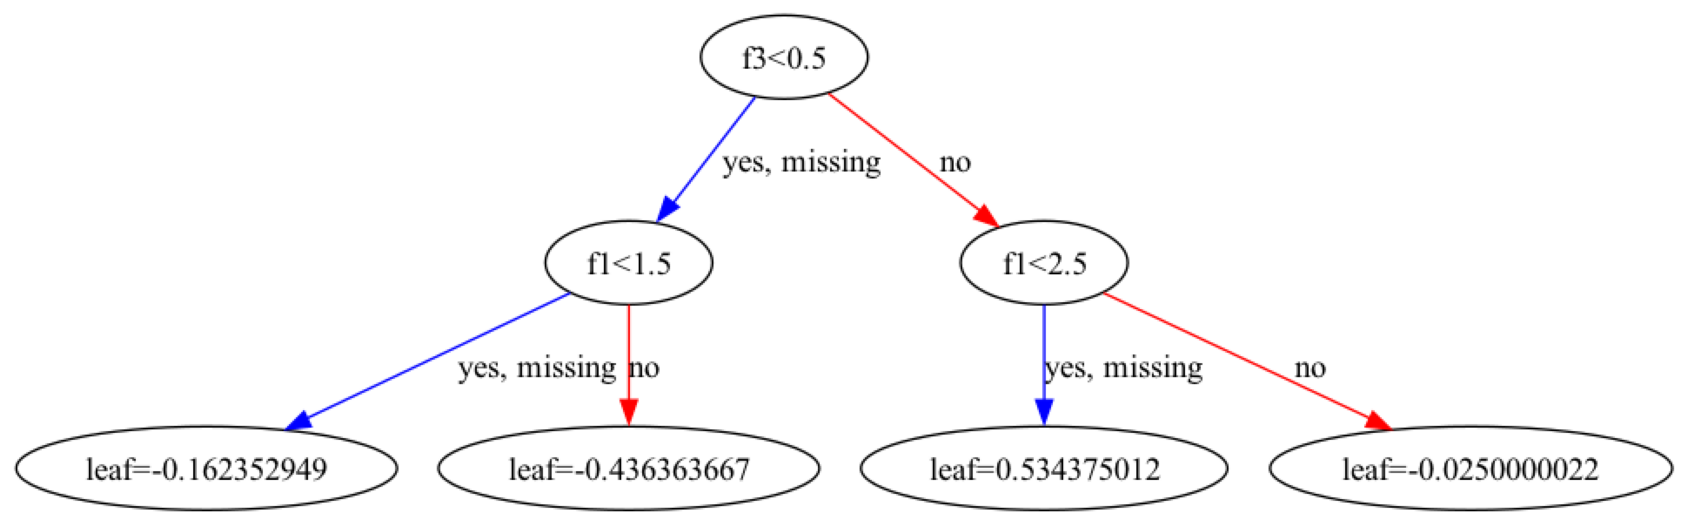

In [22]:
plot_tree(xgb_clf)
plt.gcf().set_size_inches(30, 20)
plt.show()

In [28]:
import numpy as np
1/(1+np.exp(-1*-(0.025)))

0.49375032550048964

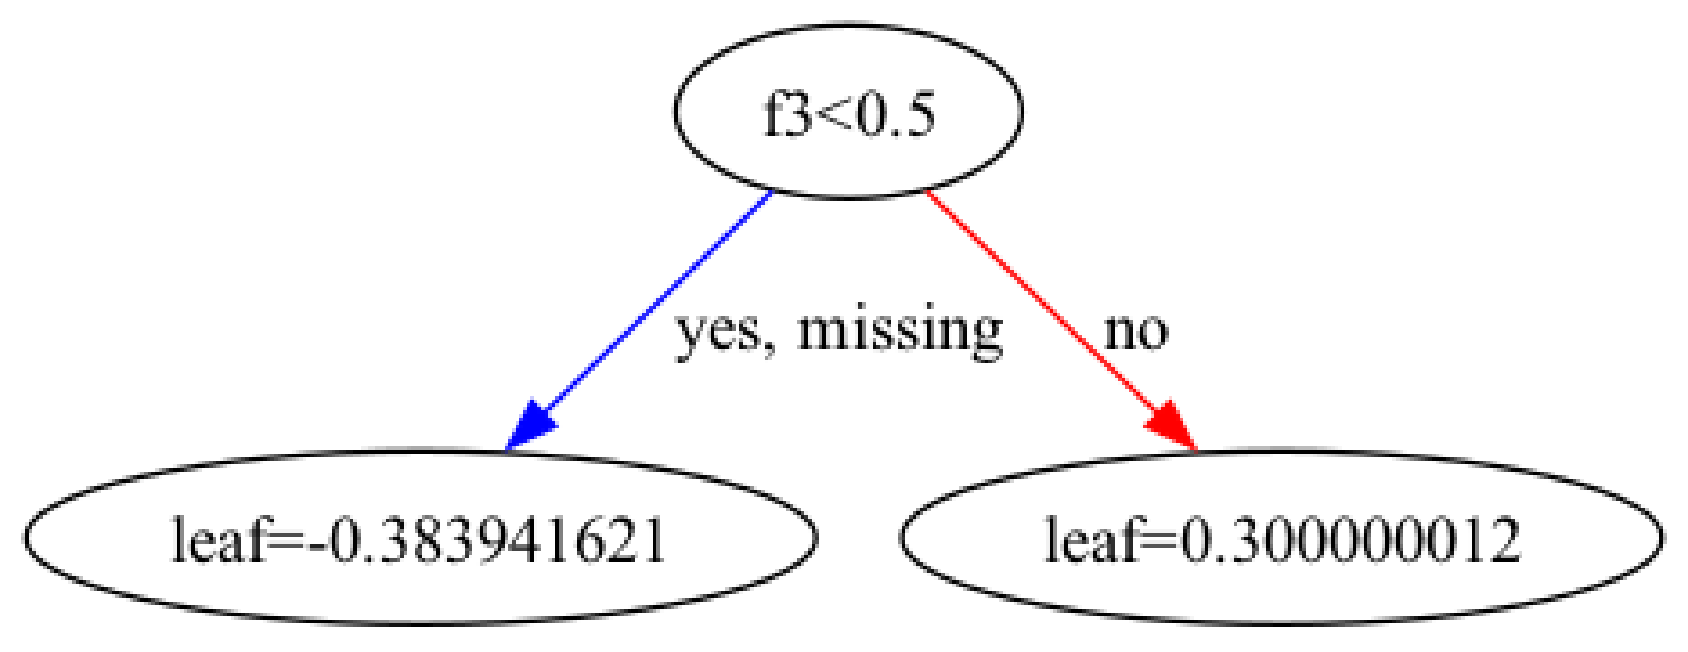

In [29]:
xgb_clf1 = XGBClassifier(max_depth = 1)
xgb_clf1.fit(X_train, y_train)
plot_tree(xgb_clf1)
plt.gcf().set_size_inches(30, 20)
plt.show()